In [71]:
import random
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class TicTacToeGame:

    def initialize_baord(self) :
        self.ttt_board = {
                            1: ' ', 2:' ', 3: ' ',
                            4: ' ', 5:' ', 6: ' ',
                            7: ' ', 8:' ', 9: ' '
                         }
    def validateMove(self, move):
        return self.ttt_board[move] == ' '

    def validateDraw(self):
        return all(self.ttt_board[key] != ' ' for key in self.ttt_board.keys())

    def validateWin(self):
        win_combinations = [
            (1, 2, 3), (4, 5, 6), (7, 8, 9),
            (1, 4, 7), (2, 5, 8), (3, 6, 9),
            (1, 5, 9), (7, 5, 3)
        ]

        for combo in win_combinations:
            if (self.ttt_board[combo[0]] == self.ttt_board[combo[1]] == self.ttt_board[combo[2]] != ' '):
                return True

        return False

    def validateWinForLetter(self, mark):
        winning_positions = [
            (1, 2, 3), (4, 5, 6), (7, 8, 9),
            (1, 4, 7), (2, 5, 8), (3, 6, 9),
            (1, 5, 9), (7, 5, 3)
        ]
        for pos in winning_positions:
            if all(self.ttt_board[i] == mark for i in pos):
                return True
        return False

class QLearningAgent:
    def __init__(self):
        self.epsilon = 0.1
        self.QLearningStates = {}

    getPosition = lambda self, current_board: tuple(tuple(current_board[i+j] for j in range(3)) for i in range(1, 10, 3))

    def getQLearningValue_For_Action(self, current_board, current_position):
        position = self.getPosition(current_board)
        if position not in self.QLearningStates:
            self.QLearningStates[position] = np.zeros((9,))
        return self.QLearningStates[position][current_position - 1]

    def getBestPositionFromQLearning(self, current_board, possible_positions):
        return random.choice(possible_positions) if random.random() < self.epsilon else max(possible_positions, key=lambda x: self.getQLearningValue_For_Action(current_board, x))

    def updateQLearningModel(self, current_board, current_position, reward, successive_board, possible_positions):
        bestQValue = max([self.getQLearningValue_For_Action(successive_board, current_position) for next_action in possible_positions], default=0)
        optimisedQVlaue = self.getQLearningValue_For_Action(current_board, current_position) + 0.1 * ((reward + 0.99 * bestQValue) - self.getQLearningValue_For_Action(current_board, current_position))
        position = self.getPosition(current_board)
        self.QLearningStates[position][current_position - 1] = optimisedQVlaue)

    def trainQLearningModel(self):
        QLearningWin = DummyAgentWin = Draw = 0
        total_episodes = 1000
        for episode in range(total_episodes):
            ttt_game = TicTacToeGame()
            ttt_game.initialize_baord()
            current_board = ttt_game.ttt_board

            while True:
                QLearningPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]

                if len(QLearningPossible_Positions) == 0:
                    break

                QLearningPosition = self.getBestPositionFromQLearning(current_board, QLearningPossible_Positions)

                if ttt_game.validateMove(QLearningPosition):
                    ttt_game.ttt_board[QLearningPosition] = 'X'

                isQLearningWinner = ttt_game.validateWinForLetter('X')
                isDummyAgentWinner = ttt_game.validateWinForLetter('O')
                possibleMoves = [i for i in range(1, 10) if ttt_game.validateMove(i)]

                if isQLearningWinner:
                    QLearningWin += 1
                    self.updateQLearningModel(current_board, QLearningPosition, 1, ttt_game.ttt_board, [])
                    break

                elif isDummyAgentWinner:
                    DummyAgentWin += 1
                    self.updateQLearningModel(current_board, QLearningPosition, -1, ttt_game.ttt_board, [])
                    break

                elif ttt_game.validateDraw():
                    Draw += 1
                    self.updateQLearningModel(current_board, QLearningPosition, 0, ttt_game.ttt_board, [])
                    break
                else:
                    self.updateQLearningModel(current_board, QLearningPosition, 0, ttt_game.ttt_board, possibleMoves)

                DummyAgentPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]
                DummyAgentPosition = DummyAgentPossible_Positions[random.randint(0, len(DummyAgentPossible_Positions)-1)]

                if ttt_game.validateMove(DummyAgentPosition):
                    ttt_game.ttt_board[DummyAgentPosition] = 'O'

                isQLearningWinner = ttt_game.validateWinForLetter('X')
                isDummyAgentWinner = ttt_game.validateWinForLetter('O')
                possibleMoves = [i for i in range(1, 10) if ttt_game.validateMove(i)]

                if isQLearningWinner:
                    QLearningWin += 1
                    self.updateQLearningModel(current_board, DummyAgentPosition, 1, ttt_game.ttt_board, [])
                    break

                elif isDummyAgentWinner:
                    DummyAgentWin += 1
                    self.updateQLearningModel(current_board, DummyAgentPosition, -1, ttt_game.ttt_board, [])
                    break

                elif ttt_game.validateDraw():
                    Draw += 1
                    self.updateQLearningModel(current_board, DummyAgentPosition, 0, ttt_game.ttt_board, [])
                    break
                else:
                    self.updateQLearningModel(current_board, DummyAgentPosition, 0, ttt_game.ttt_board, possibleMoves)

                current_board = ttt_game.ttt_board

        return QLearningWin, DummyAgentWin, Draw, total_episodes

    def play_tic_tac_toe(self, DummyAgent_plays_first, ttt_game):
        Dummy_Agent_Letter = 'O'
        QLearning_Letter = 'X'

        while True:
            if DummyAgent_plays_first:
                DummyAgentPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]
                if len(DummyAgentPossible_Positions) == 0:
                    return "Draw"

                DummyAgentPosition = DummyAgentPossible_Positions[random.randint(0, len(DummyAgentPossible_Positions)-1)]

                if ttt_game.validateMove(DummyAgentPosition):
                    ttt_game.ttt_board[DummyAgentPosition] = Dummy_Agent_Letter

                if ttt_game.validateWinForLetter(Dummy_Agent_Letter) :
                    return "DummyAgentWon"

                if ttt_game.validateDraw():
                    return "Draw"

                QLearningPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]

                if len(QLearningPossible_Positions) == 0:
                    "Draw"

                QLearningPosition = self.getBestPositionFromQLearning(ttt_game.ttt_board, QLearningPossible_Positions)

                if ttt_game.validateMove(QLearningPosition):
                    ttt_game.ttt_board[QLearningPosition] = QLearning_Letter

                if ttt_game.validateWinForLetter(QLearning_Letter) :
                    return "QLearningWon"

                if ttt_game.validateDraw():
                    return "Draw"
            else:
                QLearningPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]
                if len(QLearningPossible_Positions) == 0:
                    break

                QLearningPosition = self.getBestPositionFromQLearning(ttt_game.ttt_board, QLearningPossible_Positions)
                if ttt_game.validateMove(QLearningPosition):
                    ttt_game.ttt_board[QLearningPosition] = QLearning_Letter

                if ttt_game.validateWinForLetter(QLearning_Letter) :
                    return "QLearningWon"

                if ttt_game.validateDraw():
                    return "Draw"

                DummyAgentPossible_Positions = [i for i in range(1, 10) if ttt_game.validateMove(i)]
                if len(DummyAgentPossible_Positions) == 0:
                    return "Draw"

                DummyAgentPosition = DummyAgentPossible_Positions[random.randint(0, len(DummyAgentPossible_Positions)-1)]
                if ttt_game.validateMove(DummyAgentPosition):
                    ttt_game.ttt_board[DummyAgentPosition] = Dummy_Agent_Letter

                if ttt_game.validateWinForLetter(Dummy_Agent_Letter) :
                    return "DummyAgentWon"

                if ttt_game.validateDraw():
                    return "Draw"

In [75]:
qLearning = QLearningAgent()
QLearningWin, DummyAgentWin, Draw, total_episodes = qLearning.trainQLearningModel()

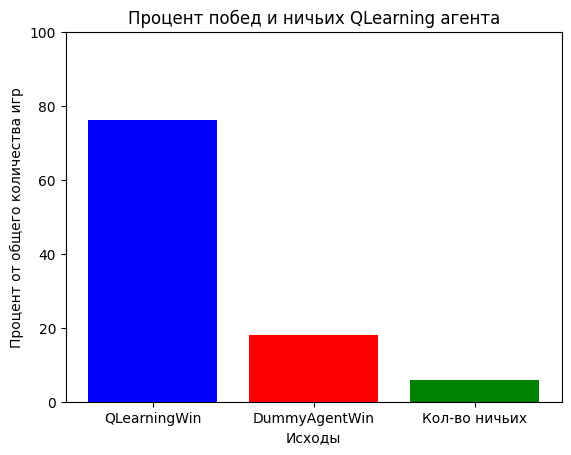

In [82]:
q_learning_win_rate = (QLearningWin / total_episodes) * 100
dummy_agent_win_rate = (DummyAgentWin / total_episodes) * 100
draw_rate = (Draw / total_episodes) * 100

win_rates = [q_learning_win_rate, dummy_agent_win_rate, draw_rate]
labels = ['QLearningWin', 'DummyAgentWin', 'Кол-во ничьих']

import matplotlib.pyplot as plt

# Построение столбчатой диаграммы
plt.bar(labels, win_rates, color=['blue', 'red', 'green'])
plt.xlabel('Исходы')
plt.ylabel('Процент от общего количества игр')
plt.title('Процент побед и ничьих QLearning агента')
plt.ylim([0, 100])
plt.show()